In [985]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'


In [986]:
import re
import sys
sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts/')

%load_ext autoreload
%autoreload 1
%aimport single_read_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1268]:
infiles = {
    'wt1029':[
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/6ma_results/20221029_col_m6A.6mA_genome_pos.tsv.gz',
        '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/20221029_col_m6A.5mC_genome_pos.tsv.gz',
    ]
}

In [1410]:
pos = 'Chr1:16,206,018-16,208,832'

m = re.match(r'(.*):(.*)-(.*)', pos)
chrom = m.group(1)
start = int(m.group(2).replace(',', ''))
end = int(m.group(3).replace(',', ''))

In [1415]:
name = 'wt1029'
read_set = single_read_plot.preprocessing(infiles[name],  (0, 1), chrom, start, end)
len(read_set)

1205

In [1416]:
read_plot = single_read_plot.Single_Read(chrom, start, end)

gene_bed = '/data/Zhaijx/mowp/db/col-CEN/bed/ColCEN_CEN180.sorted.bed.gz'
read_plot.add_gene_model(gene_bed, arrow=False, annotation_pos=None, small_arrow=True, y_space=5, track_height=1.5)

bw_track_height = 1.2

# ATAC-seq
infile = '/data/Zhaijx/mowp/data/public_data/col_CEN_reference/atac_seq_pe/bw_cov/col_r1_ATACseq_GSM4705404.sorted.rmdup.bw'
read_plot.add_bw(infile, color='#bfbcbc', track_height=bw_track_height, data_range=(0, 100))

# WGBS
infile = '/data/Zhaijx/mowp/data/public_data/col_CEN_reference/wgbs_pe/bismark_aligned_data/bw_covearge/Col-0_rep1_ERR965674.cov.bw'
read_plot.add_bw(infile, color='#bfbcbc', track_height=bw_track_height, data_range=(0, 100))

# STAM-seq
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221005_col_shoot/aligned_data/20221005_col_shoot.sorted.q2.bw'
read_plot.add_bw(infile, color='#bfbcbc', track_height=bw_track_height, data_range=(0, 100))

read_width = 1
fully_span = True
add_bigwig = True

read_plot.add_mod_results(
    infiles[name][0],
    read_set = read_set,
    fully_span=fully_span, methylated_color='#52af4c', bw_color='#52af4c', data_range=(0, .6), bw_track_height=bw_track_height, read_width=read_width, add_bigwig=add_bigwig)
    
read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CG'),
    read_set = read_set,
    fully_span=fully_span, methylated_color='#104e8b', bw_color='#104e8b', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, add_bigwig=add_bigwig)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHG'),
    read_set = read_set,
    fully_span=fully_span, methylated_color='#1e7cff', bw_color='#1e7cff', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, add_bigwig=add_bigwig)

read_plot.add_mod_results(
    infiles[name][1].replace('5mC', 'CHH'),
    read_set = read_set,
    fully_span=fully_span, methylated_color='#03c4ff', bw_color='#03c4ff', data_range=(0, 1), bw_track_height=bw_track_height, read_width=read_width, add_bigwig=add_bigwig)

read_plot.sorted_reads()

read_plot.summary()

/public1/mowp/workspace/nanopore_modification/scripts/single_read_plot.py:587: RuntimeWarning: invalid value encountered in true_divide
  


Chr1:16206018-16208832
length: 2814
mod_tracks: mod_1, mod_2, mod_3, mod_4
bw_tracks: bigWig_1, bigWig_2, bigWig_3, bigWig_4, bigWig_5, bigWig_6, bigWig_7


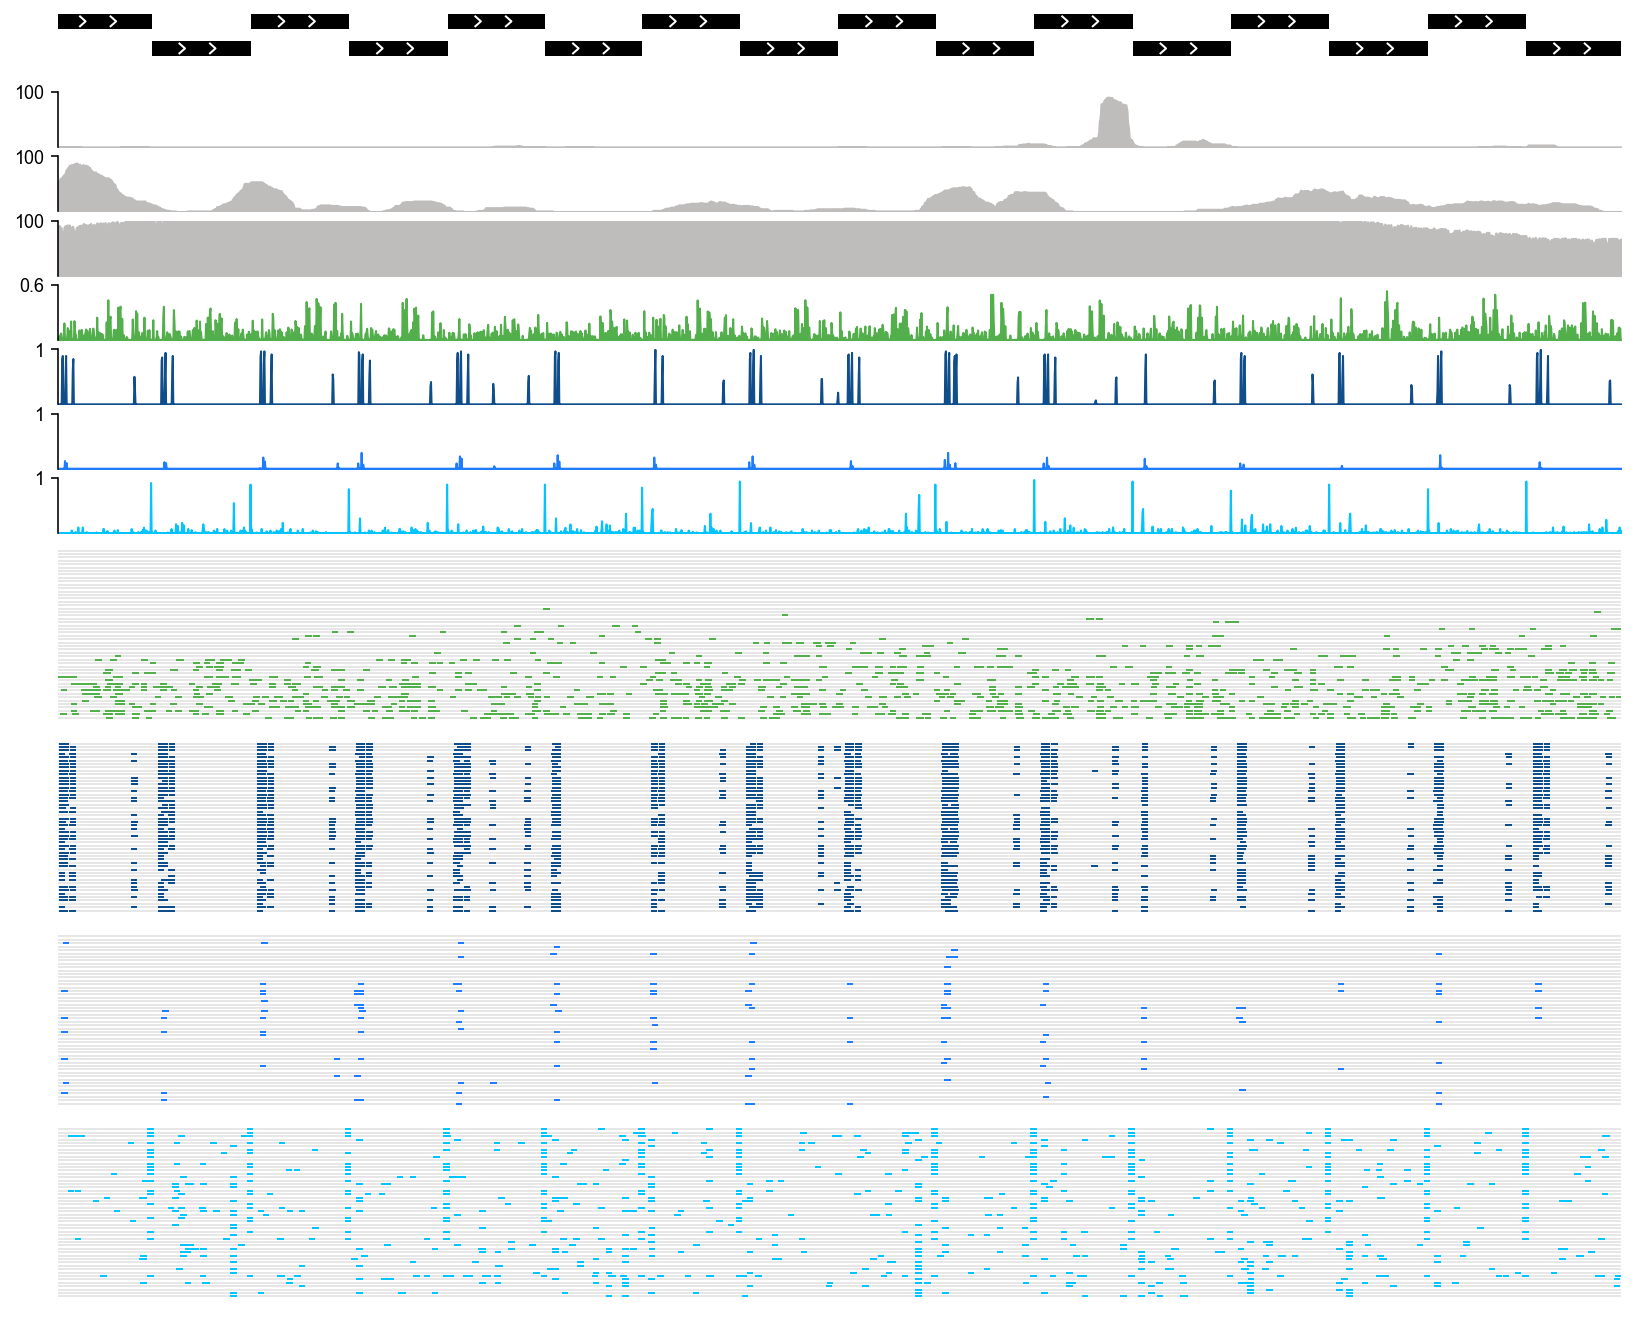

In [1418]:
read_plot.plot(
    figsize=(14, 12), hspace=.1,
    plot_order=('plot_gene_model', 'plot_bw', 'plot_mod'), xticks=False, subsample=50);

plt.savefig('single_read_plot.svg')